In [37]:
## import necessary modules
import glob 
import pandas as pd
from pprint import pprint
import os

In [38]:
## define years and quarters for processing data
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarters = [1,2,3,4]

## create a list of drugs of interest
## you need to modify this list as necessary
## the current drugs are for ADHD
## You can collect the list of drugs from an online website such as Drugs.com
asthma_drugs = ["SINGULAIR", "MONTELUKAST", "MONTELUKAST SODIUM", "singulair", "montelukast", "montelukast sodium"]

In [39]:
for year in years:
    for q in quarters:    
        ## get the file names with the designated patterns
        files = glob.glob('Data1/*' + str(year) +'*' + str(q) + '/ascii/*' + str(q) + '.txt',  
                           recursive = True) 
        for file in files: 
            print(file)
            ## read files according to their names
            if "demo" in file.lower():
                demo = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False) 
            elif "drug" in file.lower():
                drug = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False)
            elif "indi" in file.lower():
                indi = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "outc" in file.lower():
                outc = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "reac" in file.lower():
                reac = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
            elif "rpsr" in file.lower():
                rpsr = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "ther" in file.lower():
                ther = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
        ## create a mask for the data associated with ADHD
        ## delete the next statement if you want to have the entire data
        ## check "list comprehension", a new Python syntax, at the following site: 
        ## https://www.w3schools.com/python/python_lists_comprehension.asp
        mask_for_asthma = [str(med).lower() in asthma_drugs for med in drug["drugname"]]
        ## apply the mask to the columns and overwrite the drug table
        drug = drug[mask_for_asthma]
        ## join tables
        inner_join = pd.merge(left= demo, right = drug, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        ## change duplicate column names and remove one of them
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = indi, how = "inner", 
                      left_on = ["primaryid", "drug_seq"], right_on = ["primaryid", "indi_drug_seq"] )
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["indi_drug_seq"], axis= 1)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = reac, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        # drop the duplicate abbreviation column
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        # change column name
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        ## save the joined tables as csv files in the designated directories
        path = 'Result/' + str(year)+'/Quarterly'
        if not os.path.exists(path):
            os.makedirs(path)
        inner_join.to_csv(path + '/' + str(year) + '_' + str(q) + '.csv')

Data1\faers_ascii_2013q1\ascii\DEMO13Q1.txt
Data1\faers_ascii_2013q1\ascii\DRUG13Q1.txt
Data1\faers_ascii_2013q1\ascii\INDI13Q1.txt
Data1\faers_ascii_2013q1\ascii\OUTC13Q1.txt
Data1\faers_ascii_2013q1\ascii\REAC13Q1.txt
Data1\faers_ascii_2013q1\ascii\RPSR13Q1.txt
Data1\faers_ascii_2013q1\ascii\THER13Q1.txt
Data1\faers_ascii_2013q2\ascii\DEMO13Q2.txt
Data1\faers_ascii_2013q2\ascii\DRUG13Q2.txt
Data1\faers_ascii_2013q2\ascii\INDI13Q2.txt
Data1\faers_ascii_2013q2\ascii\OUTC13Q2.txt
Data1\faers_ascii_2013q2\ascii\REAC13Q2.txt
Data1\faers_ascii_2013q2\ascii\RPSR13Q2.txt
Data1\faers_ascii_2013q2\ascii\THER13Q2.txt
Data1\faers_ascii_2013q3\ascii\DEMO13Q3.txt
Data1\faers_ascii_2013q3\ascii\DRUG13Q3.txt
Data1\faers_ascii_2013q3\ascii\INDI13Q3.txt
Data1\faers_ascii_2013q3\ascii\OUTC13Q3.txt
Data1\faers_ascii_2013q3\ascii\REAC13Q3.txt
Data1\faers_ascii_2013q3\ascii\RPSR13Q3.txt
Data1\faers_ascii_2013q3\ascii\THER13Q3.txt
Data1\faers_ascii_2013q4\ascii\DEMO13Q4.txt
Data1\faers_ascii_2013q4\ascii\D

In [40]:
## open CSV files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Quarterly/' + str(year) + '*.csv', \
                           recursive = True)
    ## create an empty data frame for yearly data
    n_df = pd.DataFrame()
    ## read quarterly files
    for file in files:
        print(file)
        df = pd.read_csv(file, low_memory=False)
        ## concatenate each quartely files to "n_df" dataframe
        n_df = pd.concat([n_df,df],axis=0) 
    n_df.reset_index(inplace=True)
    ## "index" row is added, so we drop this
    n_df.drop(['index'], axis=1, inplace=True) 
    path1 = 'Result/' + str(year) + '/Yearly'
    if not os.path.exists(path1):
        os.makedirs(path1)  
    ## save the joined tables as csv files in the designated directories
    n_df.to_csv(path1 + '/' + str(year) + '_Yearly.csv', index=False)

Result/2013/Quarterly\2013_1.csv
Result/2013/Quarterly\2013_2.csv
Result/2013/Quarterly\2013_3.csv
Result/2013/Quarterly\2013_4.csv
Result/2014/Quarterly\2014_1.csv
Result/2014/Quarterly\2014_2.csv
Result/2014/Quarterly\2014_3.csv
Result/2014/Quarterly\2014_4.csv
Result/2015/Quarterly\2015_1.csv
Result/2015/Quarterly\2015_2.csv
Result/2015/Quarterly\2015_3.csv
Result/2015/Quarterly\2015_4.csv
Result/2016/Quarterly\2016_1.csv
Result/2016/Quarterly\2016_2.csv
Result/2016/Quarterly\2016_3.csv
Result/2016/Quarterly\2016_4.csv
Result/2017/Quarterly\2017_1.csv
Result/2017/Quarterly\2017_2.csv
Result/2017/Quarterly\2017_3.csv
Result/2017/Quarterly\2017_4.csv
Result/2018/Quarterly\2018_1.csv
Result/2018/Quarterly\2018_2.csv
Result/2018/Quarterly\2018_3.csv
Result/2018/Quarterly\2018_4.csv
Result/2019/Quarterly\2019_1.csv
Result/2019/Quarterly\2019_2.csv
Result/2019/Quarterly\2019_3.csv
Result/2019/Quarterly\2019_4.csv
Result/2020/Quarterly\2020_1.csv
Result/2020/Quarterly\2020_2.csv
Result/202

In [52]:
## create an empty data frame for all data
new_df = pd.DataFrame()
## read yearly files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Yearly/' + str(year) + '*.csv',  
                           recursive = True)
    df = pd.read_csv(files[0],low_memory=False)
    ## concatenate each quartely files to "n_df" dataframe
    new_df = pd.concat([new_df,df],axis=0)
    
new_df.reset_index(inplace=True)
## "index" row is added, so we drop this
new_df.drop(['index'], axis=1, inplace=True)
new_df = new_df.drop(labels= ["Unnamed: 0"], axis= 1)
path2 = 'Result/Final'

if not os.path.exists(path2):
    os.makedirs(path2)
## Save the final data
new_df.to_csv('Result/Final/singulair_montelukast.csv', index=False)

In [53]:
count = new_df.shape[0]
print(count)


346509


In [54]:
print(new_df)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0       642916618  6429166           18        F    200604.0  20130321.0   
1       642916618  6429166           18        F    200604.0  20130321.0   
2       642916618  6429166           18        F    200604.0  20130321.0   
3       642916618  6429166           18        F    200604.0  20130321.0   
4       642916618  6429166           18        F    200604.0  20130321.0   
...           ...      ...          ...      ...         ...         ...   
346504  990796020  9907960           20        F  20120724.0  20201105.0   
346505  990796020  9907960           20        F  20120724.0  20201105.0   
346506  990796020  9907960           20        F  20120724.0  20201105.0   
346507  990796020  9907960           20        F  20120724.0  20201105.0   
346508   99945955  9994595            5        F  20140121.0  20201224.0   

        init_fda_dt    fda_dt rept_cod  \
0          20070927  20130328      EXP   
1  

In [55]:
# Find all rows where "Asthma" (or variations of this word) appears in indi_pt or pt columns
asthma_rows = new_df[new_df['indi_pt'].str.contains('Asthma|asthma|ASTHMA') | new_df['pt'].str.contains('Asthma|asthma|ASTHMA')]

# Print the resulting DataFrame
print(asthma_rows)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
1       642916618  6429166           18        F    200604.0  20130321.0   
27       69675222  6967522            2        F    200902.0  20130207.0   
28       69675222  6967522            2        F    200902.0  20130207.0   
29       69675222  6967522            2        F    200902.0  20130207.0   
46      742910110  7429101           10        F  20090605.0  20130117.0   
...           ...      ...          ...      ...         ...         ...   
346452  986902720  9869027           20        F  20121008.0  20201217.0   
346453   98757794  9875779            4        F  20130612.0  20201013.0   
346455   98757794  9875779            4        F  20130612.0  20201013.0   
346460  989327135  9893271           35        F  20130603.0  20201013.0   
346485  990796020  9907960           20        F  20120724.0  20201105.0   

        init_fda_dt    fda_dt rept_cod  \
1          20070927  20130328      EXP   
27 

In [56]:
print(new_df.columns)


Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'age',
       'age_cod', 'gndr_cod', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr',
       'occp_cod', 'reporter_country', 'occr_country', 'drug_seq', 'role_cod',
       'drugname', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num',
       'dose_amt', 'dose_unit', 'dose_form', 'dose_freq', 'indi_pt', 'pt',
       'auth_num', 'lit_ref', 'age_grp', 'sex', 'prod_ai', 'drug_rec_act'],
      dtype='object')


In [57]:
## Just to examine attributes' of duplicated instances
duplicateRowsDF = new_df[new_df.duplicated(["primaryid","caseid","drugname","pt"], keep = False)]

In [58]:
new_df.drop_duplicates(subset=["primaryid","caseid","drugname","pt"], keep = "first", inplace = True)

In [59]:
new_df.shape

(330525, 47)

In [60]:
age_mask = (new_df["age"] >= 18) & (new_df["age"] <= 65) 
age_mask.value_counts()

True     170810
False    159715
Name: age, dtype: int64

In [61]:
new_df = new_df[age_mask]
new_df.shape

(170810, 47)

In [62]:
new_df.head(20)

primaryid   caseid  caseversion i_f_code  event_dt      mfr_dt  \
0   642916618  6429166           18        F  200604.0  20130321.0   
1   642916618  6429166           18        F  200604.0  20130321.0   
2   642916618  6429166           18        F  200604.0  20130321.0   
3   642916618  6429166           18        F  200604.0  20130321.0   
4   642916618  6429166           18        F  200604.0  20130321.0   
5   642916618  6429166           18        F  200604.0  20130321.0   
6   642916618  6429166           18        F  200604.0  20130321.0   
7   642916618  6429166           18        F  200604.0  20130321.0   
8   642916618  6429166           18        F  200604.0  20130321.0   
9   642916618  6429166           18        F  200604.0  20130321.0   
10  642916618  6429166           18        F  200604.0  20130321.0   
11  642916618  6429166           18        F  200604.0  20130321.0   
12  642916618  6429166           18        F  200604.0  20130321.0   
13  642916618  6429166           18        F  200604.0  20130321.0   
14  642916618  6429166           18        F  200604.0  20130321.0   
15  642916618  6429166           18        F  200604.0  20130321.0   
16  642916618  6429166           18        F  200604.0  20130321.0   
17  642916618  6429166           18        F  200604.0  20130321.0   
18  642916618  6429166           18        F  200604.0  20130321.0   
19  642916618  6429166           18        F  200604.0  20130321.0   

    init_fda_dt    fda_dt rept_cod  \
0      20070927  20130328      EXP   
1      20070927  20130328      EXP   
2      20070927  20130328      EXP   
3      20070927  20130328      EXP   
4      20070927  20130328      EXP   
5      20070927  20130328      EXP   
6      20070927  20130328      EXP   
7      20070927  20130328      EXP   
8      20070927  20130328      EXP   
9      20070927  20130328      EXP   
10     20070927  20130328      EXP   
11     20070927  20130328      EXP   
12     20070927  20130328      EXP   
13     20070927  20130328      EXP   
14     20070927  20130328      EXP   
15     20070927  20130328      EXP   
16     20070927  20130328      EXP   
17     20070927  20130328      EXP   
18     20070927  20130328      EXP   
19     20070927  20130328      EXP   

                                              mfr_num  ... dose_form  \
0   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
1   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
2   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
3   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
4   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
5   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
6   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
7   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
8   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
9   US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
10  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
11  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
12  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
13  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
14  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
15  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
16  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
17  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
18  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
19  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   

    dose_freq           indi_pt                                 pt auth_num  \
0          QD  Seasonal allergy              Adverse drug reaction      NaN   
1          QD  Seasonal allergy                             Ast

In [63]:
new_df.to_csv('selecteddrugs.csv', index=False)

In [64]:
baskets = []
num = 1
temp_basket = []
last_line = False
for index, row in new_df.iterrows():
    ## check whether the new row is from the same patient or not
    ## If it is the same patient, the new row will be put into the same basket
    ## If not, create a new basket.
    if num == 1:
        previous_id = row["caseid"]
        current_id = row["caseid"]
        first_line = True
    elif num == new_df.shape[0]:
        last_line = True
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    else:
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    ## if the new row is from the same patient, only add the adverse drug reaction
    if previous_id == current_id :
        same_patient = True
    else:
        same_patient = False
    if same_patient:
        temp_basket.append(row["pt"])
        if first_line:
            temp_basket.append(row["drugname"])
    else:
        baskets.append(temp_basket)
        temp_basket = []
        temp_basket.append(row["drugname"])
        temp_basket.append(row["pt"])
    if last_line:
        baskets.append(temp_basket)
    num += 1
    

In [65]:
len(baskets)

19825

In [66]:
baskets[1]

['SINGULAIR', 'Dyspnoea', 'Erythema', 'Pruritus', 'Urticaria', 'Wheezing']

In [67]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))

{'Tubular breast carcinoma', 'Meningorrhagia', 'Clostridium difficile colitis', 'Rotator cuff syndrome', 'Periodontal disease', 'Acute psychosis', 'Trisomy 21', 'Sexual dysfunction', 'QRS axis abnormal', 'Allergic granulomatous angiitis', 'Gastric operation', 'SARS-CoV-2 test positive', 'Hypertrichosis', 'Unemployment', 'Implant site erythema', 'Pleural effusion', 'Expired product administered', 'Superficial injury of eye', 'Tuberculin test positive', 'Aortic arteriosclerosis', 'Gastric perforation', 'Mast cell activation syndrome', 'Blood immunoglobulin E decreased', 'Serositis', 'Cardiac valve vegetation', 'Inferiority complex', 'Accident at home', 'Lupus-like syndrome', 'Crystal urine', 'General physical condition abnormal', 'Lymphadenopathy', 'Diverticulitis intestinal haemorrhagic', 'Device failure', 'Dyshidrotic eczema', 'Nasal polypectomy', 'Gastrointestinal viral infection', 'Polyarthritis', 'Brain stem stroke', 'Hypoaesthesia', 'Pleural thickening', 'Infrequent bowel movements

In [68]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Tubular breast carcinoma  Clostridium difficile colitis  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   Rotator cuff syndrome  Trisomy 21  Sexual dysfunction  \
0                      0           0                   0   
1                      0           0                   0   
2                      0           0                   0   
3                      0           0                   0   
4                      0           0                   0   

   Allergic granulomatous angiitis  Gastric operation  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0    

In [69]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(converted_basket, min_support=0.05
                            , use_colnames=True)

print(frequent_itemsets.head())

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support      itemsets
0  0.057806     (Pyrexia)
1  0.052459  (Bronchitis)
2  0.053922   (Influenza)
3  0.054124   (Urticaria)
4  0.052610     (Anxiety)


In [71]:
frequent_itemsets = apriori(converted_basket, min_support=0.05, use_colnames=True)

print(frequent_itemsets)

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                         itemsets
0   0.057806                        (Pyrexia)
1   0.052459                     (Bronchitis)
2   0.053922                      (Influenza)
3   0.054124                      (Urticaria)
4   0.052610                        (Anxiety)
..       ...                              ...
57  0.066683       (Asthma, Cough, SINGULAIR)
58  0.080303    (Asthma, SINGULAIR, Dyspnoea)
59  0.061185     (Wheezing, Dyspnoea, Asthma)
60  0.057301  (Wheezing, SINGULAIR, Dyspnoea)
61  0.064464    (Wheezing, SINGULAIR, Asthma)

[62 rows x 2 columns]


In [72]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

            antecedents            consequents  antecedent support  \
0            (Headache)            (SINGULAIR)            0.116873   
1           (SINGULAIR)             (Headache)            0.670567   
2    (Productive cough)            (SINGULAIR)            0.064363   
3           (SINGULAIR)     (Productive cough)            0.670567   
4    (Weight decreased)            (SINGULAIR)            0.074552   
..                  ...                    ...                 ...   
85   (Wheezing, Asthma)            (SINGULAIR)            0.079596   
86  (Asthma, SINGULAIR)             (Wheezing)            0.167011   
87           (Wheezing)    (Asthma, SINGULAIR)            0.102799   
88          (SINGULAIR)     (Wheezing, Asthma)            0.670567   
89             (Asthma)  (Wheezing, SINGULAIR)            0.215536   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.670567  0.088928    0.760898  1.134707  0.010557    1.377789  
1

In [73]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.3) ].sort_values(by=['lift'], ascending=False)

antecedents         consequents  antecedent support  \
75          (Wheezing)  (Asthma, Dyspnoea)            0.102799   
74  (Asthma, Dyspnoea)          (Wheezing)            0.103808   
73  (Wheezing, Asthma)          (Dyspnoea)            0.079596   
76          (Dyspnoea)  (Wheezing, Asthma)            0.177301   
31             (Cough)          (Wheezing)            0.133619   
..                 ...                 ...                 ...   
0           (Headache)         (SINGULAIR)            0.116873   
44         (Pneumonia)         (SINGULAIR)            0.073745   
35          (Dyspnoea)         (SINGULAIR)            0.177301   
22            (Nausea)         (SINGULAIR)            0.077276   
43  (Drug ineffective)         (SINGULAIR)            0.093821   

    consequent support   support  confidence      lift  leverage  conviction  
75            0.103808  0.061185    0.595191  5.733561  0.050514    2.213865  
74            0.102799  0.061185    0.589407  5.733561  0.050514    2.185134  
73            0.177301  0.061185    0.768695  4.335525  0.047073    3.556763  
76            0.079596  0.061185    0.345092  4.335525  0.047073    1.405395  
31            0.102799  0.059470    0.445074  4.329531  0.045734    1.616792  
..                 ...       ...         ...       ...       ...         ...  
0             0.670567  0.088928    0.760898  1.134707  0.010557    1.377789  
44            0.670567  0.054527    0.739398  1.102645  0.005076    1.264122  
35            0.670567  0.130946    0.738549  1.101379  0.012053    1.260017  
22            0.670567  0.055889    0.723238  1.078546  0.004070    1.190308  
43            0.670567  0.065473    0.697849  1.040685  0.002560    1.090293  

[64 rows x 9 columns]

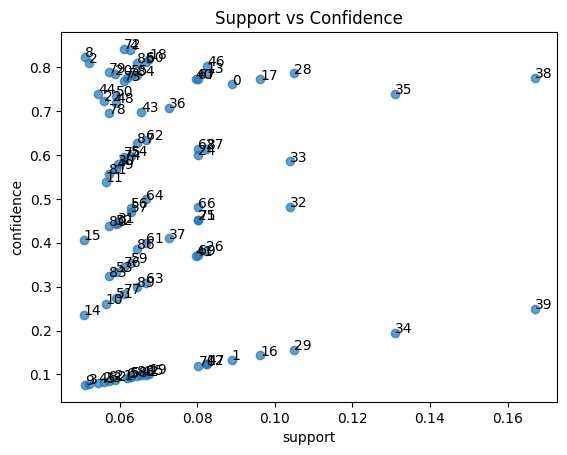

In [74]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [75]:
# group the data by 'Suspect Product Names' and count the number of occurrences
count_df = new_df.groupby('drugname').size().reset_index(name='Count')

# sort the data by 'Count' in descending order
sorted_df = count_df.sort_values(by='Count', ascending=False)

# print the top 10 results
print(sorted_df.head(10))

             drugname   Count
4           SINGULAIR  126878
0         MONTELUKAST   43046
1  MONTELUKAST SODIUM     490
5           Singulair     217
2         Montelukast     161
3  Montelukast sodium      13
6         montelukast       4
7           singulair       1


In [76]:
# filter rows where 'drugname' is 'MONTELUKAST'
namesearch_df = new_df[new_df['drugname'] == 'SINGULAIR']

# print the results
print(namesearch_df)


        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0       642916618  6429166           18        F    200604.0  20130321.0   
1       642916618  6429166           18        F    200604.0  20130321.0   
2       642916618  6429166           18        F    200604.0  20130321.0   
3       642916618  6429166           18        F    200604.0  20130321.0   
4       642916618  6429166           18        F    200604.0  20130321.0   
...           ...      ...          ...      ...         ...         ...   
346504  990796020  9907960           20        F  20120724.0  20201105.0   
346505  990796020  9907960           20        F  20120724.0  20201105.0   
346506  990796020  9907960           20        F  20120724.0  20201105.0   
346507  990796020  9907960           20        F  20120724.0  20201105.0   
346508   99945955  9994595            5        F  20140121.0  20201224.0   

        init_fda_dt    fda_dt rept_cod  \
0          20070927  20130328      EXP   
1  

In [77]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [79]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
drugname_df = new_df[new_df['drugname'] == 'SINGULAIR']

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('pain', 6923), ('increased', 6060), ('decreased', 5165), ('disorder', 4406), ('blood', 4071), ('infection', 3831), ('asthma', 3494), ('cough', 3421), ('dyspnoea', 3417), ('respiratory', 3140)]


In [80]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords



In [81]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\2864901946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [82]:
stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\2917538086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [83]:
fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [84]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


pain: 6923
increased: 6060
decreased: 5165
disorder: 4406
blood: 4071
infection: 3831
asthma: 3545
cough: 3421
dyspnoea: 3417
respiratory: 3152


In [85]:
for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 0:
adverse: 1
drug: 1
reaction: 1
Row 1:
asthma: 1
Row 2:
burning: 1
sensation: 1
Row 3:
cough: 1
Row 4:
drug: 1
effect: 1
incomplete: 1
Row 5:
drug: 1
ineffective: 1
Row 6:
drug: 1
intolerance: 1
Row 7:
dyspnoea: 1
Row 8:
exercise: 1
tolerance: 1
decreased: 1
Row 9:
incorrect: 1
dose: 1
administered: 1
Row 10:
inflammation: 1
Row 11:
lung: 1
disorder: 1
Row 12:
oral: 1
fungal: 1
infection: 1
Row 13:
oral: 1
pain: 1
Row 14:
oropharyngeal: 1
pain: 1
Row 15:
painful: 1
respiration: 1
Row 16:
pneumonia: 1
Row 17:
product: 1
quality: 1
issue: 1
Row 18:
pulmonary: 1
congestion: 1
Row 19:
pulmonary: 1
function: 1
test: 1
decreased: 1
Row 20:
respiratory: 1
tract: 1
irritation: 1
Row 21:
wheezing: 1
Row 22:
dyspnoea: 1
Row 23:
erythema: 1
Row 24:
pruritus: 1
Row 25:
urticaria: 1
Row 26:
wheezing: 1
Row 30:
breast: 1
cancer: 1
female: 1
Row 46:
asthma: 1
Row 47:
blood: 1
pressure: 1
decreased: 1
Row 48:
chest: 1
discomfort: 1
Row 49:
cough: 1
Row 50:
dizziness: 1
Row 51:
dyspnoea: 1
Row 52

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Row 296654:
swelling: 1
face: 1
Row 296655:
therapeutic: 1
product: 1
effect: 1
incomplete: 1
Row 296656:
weight: 1
increased: 1
Row 296657:
wheezing: 1
Row 296665:
hospitalisation: 1
Row 296698:
abnormal: 1
behaviour: 1
Row 296699:
aggression: 1
Row 296700:
anger: 1
Row 296701:
anxiety: 1
Row 296702:
attention: 1
deficit: 1
hyperactivity: 1
disorder: 1
Row 296703:
cognitive: 1
disorder: 1
Row 296704:
hyperhidrosis: 1
Row 296705:
loss: 1
employment: 1
Row 296706:
major: 1
depression: 1
Row 296707:
panic: 1
attack: 1
Row 296717:
asthma: 1
Row 296718:
blood: 1
count: 1
abnormal: 1
Row 296719:
therapeutic: 1
product: 1
effect: 1
incomplete: 1
Row 296723:
asthma: 1
Row 296724:
exposure: 1
pregnancy: 1
Row 296728:
abdominal: 1
pain: 1
upper: 1
Row 296729:
asthma: 1
Row 296730:
blood: 1
count: 1
abnormal: 1
Row 296731:
eosinophil: 1
count: 1
abnormal: 1
Row 296732:
glaucoma: 1
Row 296733:
neck: 1
pain: 1
Row 296734:
pain: 1
extremity: 1
Row 296735:
therapeutic: 1
product: 1
effect: 1
incompl

In [86]:
# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\888490968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')


asthma: 3487
dyspnoea: 2718
cough: 2172
fatigue: 1970
headache: 1792
wheezing: 1718
malaise: 1702
nasopharyngitis: 1397
drug ineffective: 1322
pain: 1278
weight decreased: 1275
blood pressure increased: 1225
pneumonia: 1149
nausea: 1143
productive cough: 1116
hypersensitivity: 1037
chest discomfort: 1003
sinusitis: 996
bronchitis: 939
dizziness: 937
influenza: 908
pyrexia: 887
back pain: 852
arthralgia: 844
pruritus: 823
heart rate increased: 821
weight increased: 819
diarrhoea: 804
insomnia: 778
nasal congestion: 766
urticaria: 746
obstructive airways disorder: 735
sputum discoloured: 723
anxiety: 695
fall: 692
asthenia: 676
pain in extremity: 661
oropharyngeal pain: 658
feeling abnormal: 657
erythema: 636
dyspnoea exertional: 597
lower respiratory tract infection: 593
forced expiratory volume decreased: 588
vomiting: 582
injection site pain: 579
rash: 563
chest pain: 551
rhinorrhoea: 547
upper respiratory tract infection: 527
hypertension: 518
drug hypersensitivity: 484
depression: 4

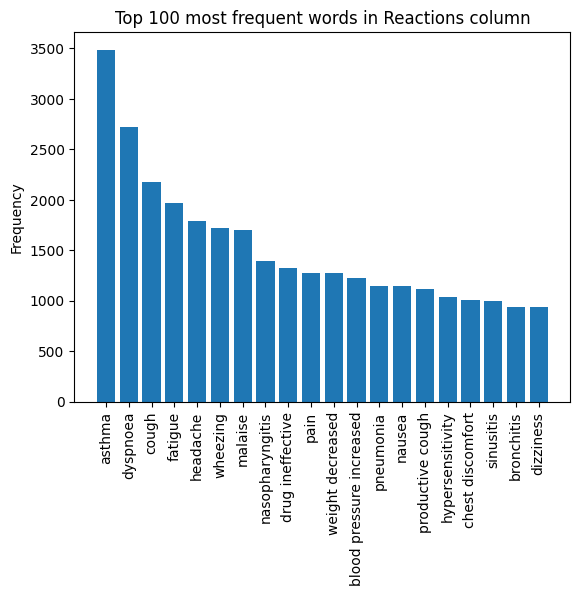

In [87]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = drugname_df['pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()


In [88]:
new_df.to_csv('singular_montelukast.csv', index=False)

In [89]:
# filter rows where 'drugname' is 'MONTELUKAST'
namesearch_df = new_df[new_df['drugname'] == 'MONTELUKAST']

# print the results
print(namesearch_df)


        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0       642916618  6429166           18        F    200604.0  20130321.0   
1       642916618  6429166           18        F    200604.0  20130321.0   
2       642916618  6429166           18        F    200604.0  20130321.0   
3       642916618  6429166           18        F    200604.0  20130321.0   
4       642916618  6429166           18        F    200604.0  20130321.0   
...           ...      ...          ...      ...         ...         ...   
346504  990796020  9907960           20        F  20120724.0  20201105.0   
346505  990796020  9907960           20        F  20120724.0  20201105.0   
346506  990796020  9907960           20        F  20120724.0  20201105.0   
346507  990796020  9907960           20        F  20120724.0  20201105.0   
346508   99945955  9994595            5        F  20140121.0  20201224.0   

        init_fda_dt    fda_dt rept_cod  \
0          20070927  20130328      EXP   
1  

In [90]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [92]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
drugname_df = new_df[new_df['drugname'] == 'MONTELUKAST']

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('pain', 1976), ('increased', 1844), ('decreased', 1553), ('blood', 1309), ('disorder', 1291), ('dyspnoea', 1176), ('drug', 1057), ('infection', 1023), ('asthma', 990), ('product', 980)]


In [93]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords



In [94]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\2864901946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [95]:
stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\2917538086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [96]:
fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [97]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


pain: 1976
increased: 1844
decreased: 1553
blood: 1309
disorder: 1291
dyspnoea: 1176
drug: 1096
infection: 1023
asthma: 1000
product: 980


In [98]:
for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 726:
autoimmune: 1
thyroiditis: 1
Row 727:
drug: 1
effect: 1
incomplete: 1
Row 728:
hypersensitivity: 1
Row 729:
pain: 1
Row 971:
lactic: 1
acidosis: 1
Row 1199:
dizziness: 1
Row 1200:
product: 1
substitution: 1
issue: 1
Row 1201:
vertigo: 1
Row 2555:
analgesic: 1
asthma: 1
syndrome: 1
Row 2556:
bronchospasm: 1
Row 2557:
dyspnoea: 1
Row 2558:
pancreatitis: 1
acute: 1
Row 2559:
urticaria: 1
Row 2560:
wheezing: 1
Row 2753:
chest: 1
discomfort: 1
Row 2754:
cough: 1
Row 2755:
drug: 1
dose: 1
omission: 1
Row 2756:
drug: 1
ineffective: 1
Row 2757:
lung: 1
disorder: 1
Row 2758:
label: 1
use: 1
Row 2759:
pertussis: 1
Row 2760:
sinusitis: 1
Row 4031:
asthma: 1
Row 4032:
drug: 1
ineffective: 1
Row 4033:
product: 1
substitution: 1
issue: 1
Row 4933:
asthma: 1
Row 4934:
product: 1
substitution: 1
issue: 1
Row 4935:
urticaria: 1
Row 4947:
fear: 1
Row 4948:
feeling: 1
abnormal: 1
Row 4949:
nightmare: 1
Row 4950:
palpitations: 1
Row 4951:
suicidal: 1
ideation: 1
Row 4952:
thinking: 1
abnormal: 1


In [99]:
# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


C:\Users\chera\AppData\Local\Temp\ipykernel_4876\888490968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')


asthma: 983
dyspnoea: 947
fatigue: 594
cough: 588
drug ineffective: 559
headache: 558
malaise: 449
nausea: 437
wheezing: 415
pneumonia: 393
urticaria: 385
pain: 378
anxiety: 358
dizziness: 354
diarrhoea: 347
blood pressure increased: 337
pyrexia: 322
pruritus: 317
insomnia: 305
nasopharyngitis: 300
arthralgia: 296
vomiting: 291
chest discomfort: 272
weight increased: 270
productive cough: 261
off label use: 260
weight decreased: 257
fall: 244
hypersensitivity: 238
depression: 237
asthenia: 234
rash: 233
feeling abnormal: 231
sinusitis: 226
nasal congestion: 211
pain in extremity: 211
influenza: 205
heart rate increased: 200
condition aggravated: 196
oropharyngeal pain: 189
obstructive airways disorder: 187
dyspnoea exertional: 179
sputum discoloured: 174
chest pain: 173
erythema: 172
lower respiratory tract infection: 171
therapeutic product effect incomplete: 171
hypertension: 162
back pain: 161
peripheral swelling: 159
hypoaesthesia: 157
product use in unapproved indication: 157
para

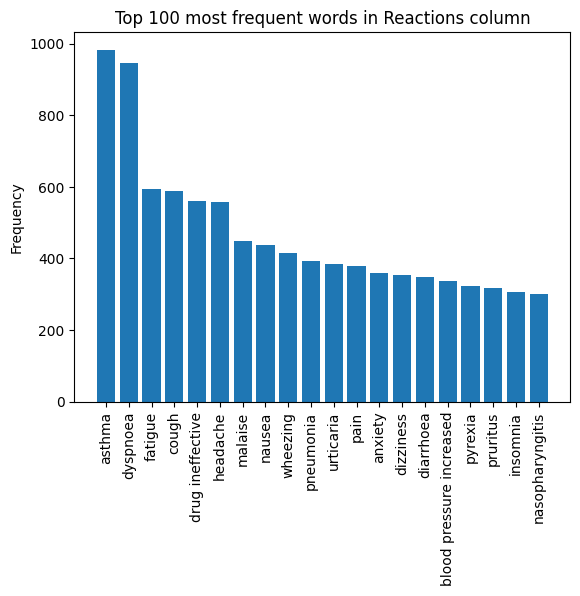

In [100]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = drugname_df['pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()
